<a href="https://colab.research.google.com/github/wogur9503/AI-bootcamp-/blob/main/Game%20Sales%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **프로젝트 : 게임데이터 분석**

최소 요구 조건

1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vgames_data = pd.read_csv('vgames2.csv')
vgames_data.head()
vgames_data = vgames_data.drop(['Unnamed: 0'], axis=1)
vgames_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


**지역에 따라 선호하는 게임 장르 분석**

In [4]:
# sales_data라는 새로운 데이터 프레임 생성
sales_data = pd.DataFrame()
sales_data['Genre'] = vgames_data['Genre']
sales_data['NA_Sales'] = vgames_data['NA_Sales']
sales_data['EU_Sales'] = vgames_data['EU_Sales']
sales_data['JP_Sales'] = vgames_data['JP_Sales']
sales_data['Other_Sales'] = vgames_data['Other_Sales']

In [5]:
# Sales데이터 스트링에서 인티저형태 변환
def sales_2int(a) :
  if a[-1] == 'M':
    a = a[:-1]
    a = float(a)
    a = a * 1000000
  elif a[-1] == "K":
    a = a[:-1]
    a = float(a)
    a = a * 1000
  else :
    a = float(a)
    a = a * 1000000  
  return int(a)

In [6]:
for i in range(len(sales_data['NA_Sales'])):
  sales_data['NA_Sales'][i] = sales_2int(sales_data['NA_Sales'][i])
for i in range(len(sales_data['EU_Sales'])):
  sales_data['EU_Sales'][i] = sales_2int(sales_data['EU_Sales'][i])
for i in range(len(sales_data['JP_Sales'])):
  sales_data['JP_Sales'][i] = sales_2int(sales_data['JP_Sales'][i])
for i in range(len(sales_data['NA_Sales'])):
  sales_data['Other_Sales'][i] = sales_2int(sales_data['Other_Sales'][i])

In [7]:
# 장르 순으로 sorting 후, 장르 인덱스를 다시 열로 빼냄.
sales_data.sort_values(by='Genre', inplace=True)
sales_data2 = sales_data.groupby('Genre').sum()
sales_data2 = sales_data2.reset_index()
sales_data2['Genre'] = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']

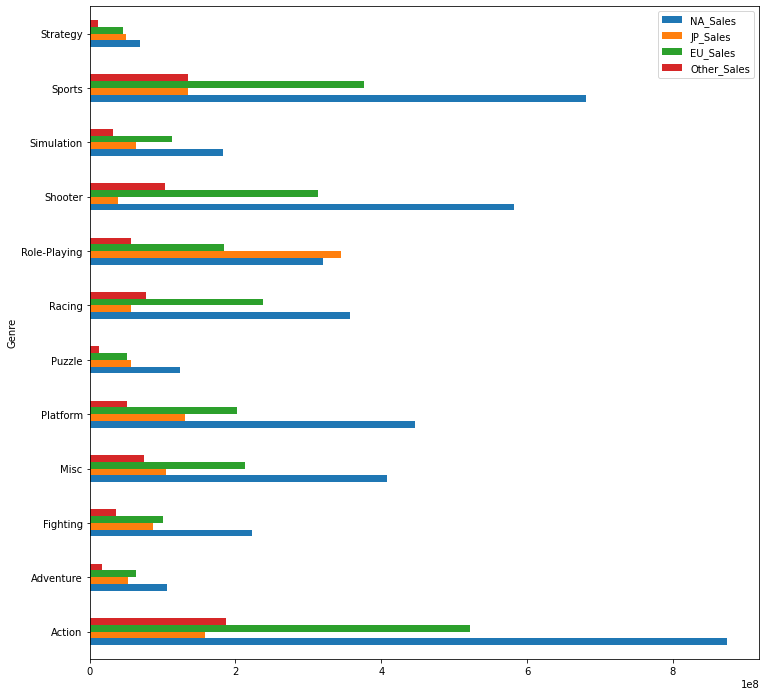

In [23]:
# 시각화

sales_data2.plot(x='Genre', y=["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"], kind="barh",figsize=(12, 12))
plt.show()

**NA에서는 전체적으로 높은 소비량을 보이고 그중에서도 Action을 선호하는 경향을 띄고,**

**EU는 NA에 비해 전체 소비량은 떨어지지만 마찬가지로 Action을 선호함.**

**JP는 EU와 비슷한 소비량을 드러내고 Role-Playing장르를 선호하며,**

**기타 국가들에서는 위 3개 분류 소비량보다 떨어지지만 선호장르는 Action으로 같다.**

# **연도별 게임 트렌드**

In [29]:
trend_data = pd.DataFrame()

vgames_data

trend_data['Year'] = vgames_data['Year']
trend_data['Platform'] = vgames_data['Platform']
trend_data['Genre'] = vgames_data['Genre']

trend_data.fillna(0)
for i in range(len(trend_data['Year'])):
  if trend_data['Year'][i] < 1000:
    trend_data['Year'][i] = 0
trend_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Year,Platform,Genre
0,2008.0,DS,Action
1,2009.0,Wii,Action
2,2010.0,PSP,Adventure
3,2010.0,DS,Misc
4,2010.0,PS3,Platform
...,...,...,...
16593,2006.0,GC,Platform
16594,2005.0,PSP,Action
16595,2015.0,PS3,Sports
16596,2013.0,PSV,Action
